In [1]:
# Main script for XFOIL automation and RL agent training

In [2]:
# Genetive Algorithms

# Keep Record of:
    # Optimal airfoil shape
    # Convergence history
    # Performance metrics at each generation

# Objective: 
    # Maximize L/D ratio at a given angle of attack and Reynolds number

# Constraints: 
    # Leading edge and trailing edge coordinates fixed 
    # Maximum thickness constraint
    # No self-intersecting airfoil shapes

# Variables:
    # Control points for Bezier curves defining airfoil shape
    # Reynolds number


In [3]:
# Reinforcement Learning

# Keep Record of:
    # Optimal airfoil shape
    # Action history
    # State history
    # Reward history
    # Training performance over episodes

# Objective: 
    # Maximize L/D ratio at a given angle of attack and Reynolds number

# Constraints: 
    # Leading edge and trailing edge coordinates fixed 
    # Maximum thickness constraint
    # No self-intersecting airfoil shapes

# Variables:
    # Control points for Bezier curves defining airfoil shape
    # Discount factor for future rewards
    # Learning rate for updating policy 
    # Number of episodes for training 
    # Reynolds number


In [4]:
# Function for generating .dat files for XFOIL
    
# Input: 
    # Continuous function defining airfoil shape
    # Number of points to sample
    # Sample point distribution

# Output: 
    # .dat file for XFOIL

In [5]:
# Function for creating bezier curves to define airfoil shapes

# Input: 
    # Control points for Bezier curves

# Output: 
    # Continuous function defining airfoil shape

In [15]:
# Run XFOIL for given airfoil shape and operating conditions

# IT WORKS!!!

import os
import subprocess
import numpy as np

# Inputs
airfoil_name = "naca0012"
alpha_i = 0
alpha_f = 10
alpha_step = 0.25
Re = 1000000
n_iter = 100

# XFOIL input file writer 
if os.path.exists("polar_file.txt"):
    os.remove("polar_file.txt")
    
input_file = open("input_file.in", 'w')
input_file.write("LOAD {0}.dat\n".format(airfoil_name))
input_file.write(airfoil_name + '\n')
input_file.write("PANE\n")
input_file.write("OPER\n")
input_file.write("Visc {0}\n".format(Re))
input_file.write("PACC\n")
input_file.write("polar_file.txt\n\n")
input_file.write("ITER {0}\n".format(n_iter))
input_file.write("ASeq {0} {1} {2}\n".format(alpha_i, alpha_f, alpha_step))
input_file.write("\n\n")
input_file.write("quit\n")
input_file.close()

subprocess.call("xfoil.exe < input_file.in", shell=True)

polar_data = np.loadtxt("polar_file.txt", skiprows=12)

In [ ]:
# Parse through polar data to extract relevant performance metrics
    
    # Input: 
        # polar data file

    # Output: 
        # CL at each angle of attack
        # CD at each angle of attack
        # L/D at each angle of attack


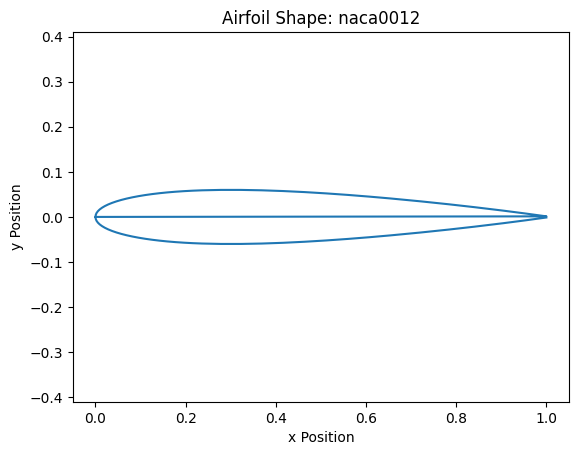

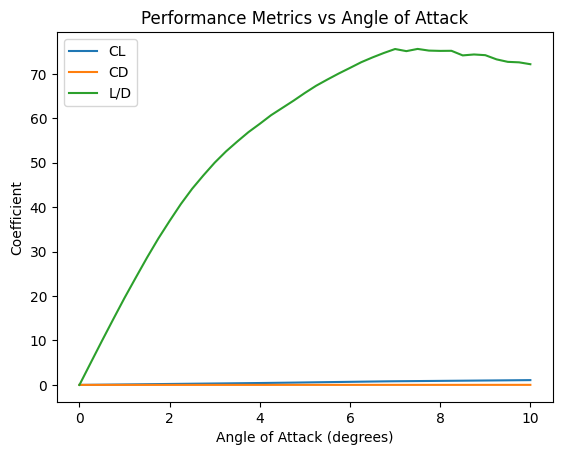

In [28]:
# Visualization of airfoil shapes and performance metrics
    # Input: 
        # Airfoil shape data
        # Performance metrics data

    # Output: 
        # Plots of airfoil shapes
        # Plots of CL, CD, and L/D vs angle of attack

import matplotlib.pyplot as plt

# Plot airfoil shape
data = np.loadtxt('naca0012.dat', skiprows=1)

# Access columns (NumPy arrays)
column1 = data[:, 0]
column2 = data[:, 1]

# Display the airfoil shape
plt.figure()
plt.title("Airfoil Shape: {0}".format(airfoil_name))
plt.xlabel("x Position")
plt.ylabel("y Position")
plt.axis("equal")
airfoil_data = np.loadtxt("{0}.dat".format(airfoil_name), skiprows=1)
plt.plot(airfoil_data[:,0], airfoil_data[:,1])

# Display performance metrics
plt.figure()
plt.title("Performance Metrics vs Angle of Attack")
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Coefficient")
plt.plot(polar_data[:,0], polar_data[:,1], label='CL')
plt.plot(polar_data[:,0], polar_data[:,2], label='CD')
plt.plot(polar_data[:,0], polar_data[:,1]/polar_data[:,2], label='L/D')
plt.legend()
plt.show()

